In [1]:
import networkx as nx
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
in_lines = open('input.txt').readlines()

In [3]:
g = nx.DiGraph()

In [4]:
in_lines[:5]

['jovejmr (40)\n',
 'fesmk (24)\n',
 'gwhfv (74)\n',
 'vxfoyx (101) -> aqytxb, ltnnn\n',
 'pvtnv (77)\n']

In [5]:
line_re = re.compile(r'^([^ ]+) \(([0-9]+)\)( -> (.*))?$')

In [6]:
match = line_re.match('vxfoyx (101) -> aqytxb, ltnnn\n')
match.groups()

('vxfoyx', '101', ' -> aqytxb, ltnnn', 'aqytxb, ltnnn')

In [7]:
match = line_re.match('gwhfv (74)\n')
match.groups()

('gwhfv', '74', None, None)

In [8]:
nodes = []

for l in in_lines:
    match = line_re.match(l).groups()
    nodes.append([match[0], match[1], None if match[3] is None else match[3].split(', ')])

In [9]:
weights = dict((n[0], int(n[1])) for n in nodes)

In [10]:
g.add_nodes_from([(n[0], {'weight': n[1]}) for n in nodes])

In [11]:
for n in nodes:
    try:
        for child in n[2]:
            g.add_edge(n[0], child)
    except TypeError:
        pass

In [19]:
root = [n for n,d in g.in_degree().items() if d==0][0]
print(f'part 1 answer: {root}')

part 1 answer: ahnofa


In [14]:
set([d for n,d in g.out_degree().items()])

{0, 2, 3, 4, 5, 6, 7}

In [15]:
from collections import Counter

In [16]:
c = Counter([d for n,d in g.out_degree().items()])

In [17]:
c

Counter({0: 839, 2: 253, 3: 99, 4: 58, 5: 16, 6: 13, 7: 14})

In [53]:
nx.bfs_successors(g, root)

{'abqvi': ['zvernrt', 'obrdxor', 'wmnengd'],
 'aeosriz': ['dhpgc', 'mgclfp', 'oivliv'],
 'aeppvjo': ['pouqokx', 'gmxfl'],
 'aexqgs': ['ighxxvd', 'orkisb'],
 'afely': ['isgef', 'vlucb', 'fridz'],
 'afucrtw': ['fajcjs', 'gsuxkc'],
 'ahnofa': ['xdpxpu', 'uewmev', 'awrwywl', 'hwezjo', 'qqqxyrl', 'luralcy'],
 'aiiswrv': ['ydktfd', 'khxsoaa'],
 'ajpjme': ['tymwxrt', 'kysjzj', 'qoiit'],
 'akgkxvi': ['prwwpd', 'bskqnj'],
 'anetug': ['gypqe', 'otise'],
 'anpriwx': ['uhczfn', 'ovpmj'],
 'asxxcu': ['vmhyd', 'ufzrbo', 'fkajvpp'],
 'atquwvk': ['vpqyy', 'hmxbpwl', 'mryloc', 'hxphn'],
 'awbgrbu': ['vuqpnz', 'xsnbmt'],
 'awrwywl': ['brjneo', 'nsqlbvb', 'vrfek', 'hxdrc', 'wfqul'],
 'awwywgr': ['lfijt', 'oqmjin'],
 'axzjpa': ['kkgpo', 'wcqxiv'],
 'bbpyckh': ['rrrrgbe', 'nyubyy'],
 'bdeol': ['ckqlnc', 'uhiwblp', 'phwnp'],
 'bgacyt': ['fjforb', 'wsclc'],
 'bjhhjla': ['fmpkb', 'qpeztu'],
 'bkeqil': ['qmoorx', 'cdogip', 'csiof'],
 'blslvmm': ['tijjvh', 'oceimpw', 'lndzbn'],
 'bmatbfz': ['vqezl', 'yiuyo'],
 

In [51]:
g[root]
    

{'awrwywl': {},
 'hwezjo': {},
 'luralcy': {},
 'qqqxyrl': {},
 'uewmev': {},
 'xdpxpu': {}}

In [54]:
nx.dag_longest_path(g)

['ahnofa', 'luralcy', 'ovpoqt', 'dkuhniy', 'zyzwas', 'xtjals']

In [48]:
order = nx.topological_sort(g)

In [50]:
order[0]

'ahnofa'

In [49]:
order

['ahnofa',
 'qqqxyrl',
 'ogyypi',
 'zlgdgn',
 'dqbrxb',
 'lhvil',
 'uuziu',
 'awrwywl',
 'brjneo',
 'lkhka',
 'gdiqocb',
 'lxnip',
 'veokoh',
 'hvnmuj',
 'mifct',
 'fclal',
 'oybkcy',
 'diauot',
 'atusqwd',
 'sgonpal',
 'dcbsi',
 'nsqlbvb',
 'evjeyvt',
 'wfqul',
 'erwjvd',
 'nqcfsr',
 'fjgzrim',
 'imruiet',
 'vrfek',
 'nlgewi',
 'czxsvq',
 'odoffm',
 'temwow',
 'hlsch',
 'nignkea',
 'ramkjx',
 'efxdvtm',
 'untjkhr',
 'yshkxu',
 'mzqmah',
 'ggmjg',
 'ubcdd',
 'luzjos',
 'xrglp',
 'odugb',
 'mjjkr',
 'qdqphk',
 'nmtme',
 'pgodqz',
 'qjwrvpi',
 'jioqtp',
 'vyzfw',
 'gyifp',
 'qmczi',
 'nqvbxx',
 'hfqskw',
 'gleaooi',
 'xdpxpu',
 'cslci',
 'phkuv',
 'cvuaf',
 'mjeja',
 'ndpsefd',
 'pqqqof',
 'ficpk',
 'bdgldyi',
 'vqglff',
 'yaxgb',
 'hznrevv',
 'tvzcg',
 'nrdcpk',
 'bmxcqpu',
 'kcuhnx',
 'ikqttp',
 'fwlhy',
 'vghgf',
 'wiadoyw',
 'kfmqmy',
 'invtlwg',
 'sbgpr',
 'fdyit',
 'gruqu',
 'jmdype',
 'rgujeec',
 'raezxi',
 'sdsyt',
 'ywtsd',
 'iqhrmo',
 'vxaqay',
 'mjofjlf',
 'sbknkwh',
 'rwzme',

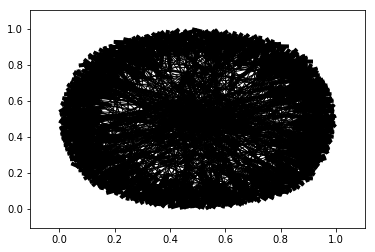

ImportError: cannot import name 'graphviz_layout'